The definition for overlap matrix here is 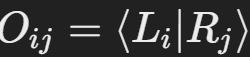 and is different from what is given in the paper of Ghosh, Roy and Kulkarni.

In [24]:
import numpy as np
from scipy.linalg import eig
from tqdm.auto import tqdm

def ginibre_matrix(n):
    """
    Generate a Ginibre Unitary Ensemble (GinUE) matrix of size n x n.
    """
    real_part = np.random.normal(loc=0.0, scale=1/np.sqrt(2), size=(n, n))
    imag_part = np.random.normal(loc=0.0, scale=1/np.sqrt(2), size=(n, n))
    return real_part + 1j * imag_part

def left_right_overlap_matrix(matrix):
    """
    Compute the overlap matrix for the left and right eigenvectors of a matrix.
    """
    # Compute left and right eigenvectors
    _, l_vectors, r_vectors = eig(matrix, left=True, right=True)

    # Normalize left and right eigenvectors
    for i in range(len(l_vectors)):
        l_vectors[:, i] /= np.sqrt(np.dot(l_vectors[:, i].conj().T, l_vectors[:, i]))
        r_vectors[:, i] /= np.sqrt(np.dot(r_vectors[:, i].conj().T, r_vectors[:, i]))

    # Compute overlap matrix
    overlap = np.dot(l_vectors.T.conj(), r_vectors)

    return overlap

# Example usage
n = 6  # Size of the GinUE matrix
ginibre = ginibre_matrix(n)
overlap_matrix = left_right_overlap_matrix(ginibre)
print("Left-Right Overlap Matrix:\n", np.abs(overlap_matrix))

Left-Right Overlap Matrix:
 [[8.61818949e-01 1.89198480e-16 3.85357989e-16 7.43528064e-16
  6.90690124e-16 6.93889390e-16]
 [2.80649740e-16 7.34905734e-01 6.27673473e-16 7.03309616e-16
  6.02526177e-16 3.93564373e-16]
 [2.38318821e-16 6.41654479e-16 7.57667943e-01 9.23420502e-16
  6.61601451e-16 4.71129946e-16]
 [1.57673437e-16 4.24006642e-16 3.28809162e-16 8.41109239e-01
  7.17437673e-16 3.56796818e-16]
 [7.15790791e-16 5.19270866e-16 5.47878721e-16 6.44890320e-16
  6.61989214e-01 4.30882405e-16]
 [2.55445869e-16 4.64489948e-16 2.94878558e-16 3.14506500e-16
  2.14208499e-16 6.99252940e-01]]


In [5]:
matrix = np.array([
    [0.5895193953969414 + 0.12338285555081702j, 0.33005123780163825 + 0.5385277696208717j, -0.5052616959584207 + 1.2935573838116243j, 0.39518860922408894 - 0.2313544636600999j],
    [-0.2285080166048638 + 0.032596683923424324j, -0.22420711204579008 - 0.19260684240142234j, 0.1769219503874783 + 0.19604171385412966j, 0.295206362102556 - 1.7922787394950488j],
    [0.7674111272635817 - 0.8355246870604126j, -0.24845261046610015 + 0.02773905550158284j, 0.45736835700274214 + 0.07758626149792867j, -0.9611466816874711 - 1.6484065116834992j],
    [-0.7588588939600162 + 0.35649129618113995j, 0.35144707311196827 - 0.7686870744630713j, 0.952089367432391 - 0.297676583435584j, 0.7893256403629985 + 0.2633719301247838j]
])

In [15]:
def compute_and_normalize_eigenvectors(matrix):
    """
    Compute and normalize left and right eigenvectors of the given matrix.

    Parameters:
    - matrix: A numpy array representing the matrix.

    Returns:
    - A tuple containing normalized left eigenvectors, normalized right eigenvectors.
    """
    # Compute left and right eigenvectors
    eigenvalues, right_eigenvectors, left_eigenvectors = eig(matrix, left=True, right=True)

    # Normalize left eigenvectors
    norm_left_eigenvectors = left_eigenvectors / np.sqrt(np.sum(np.conj(left_eigenvectors) * left_eigenvectors, axis=0))

    # Normalize right eigenvectors
    norm_right_eigenvectors = right_eigenvectors / np.sqrt(np.sum(np.conj(right_eigenvectors) * right_eigenvectors, axis=0))

    return eigenvalues, left_eigenvectors, right_eigenvectors, norm_left_eigenvectors, norm_right_eigenvectors

# Define the matrix
matrix = np.array([
    [0.5895193953969414 + 0.12338285555081702j, 0.33005123780163825 + 0.5385277696208717j, -0.5052616959584207 + 1.2935573838116243j, 0.39518860922408894 - 0.2313544636600999j],
    [-0.2285080166048638 + 0.032596683923424324j, -0.22420711204579008 - 0.19260684240142234j, 0.1769219503874783 + 0.19604171385412966j, 0.295206362102556 - 1.7922787394950488j],
    [0.7674111272635817 - 0.8355246870604126j, -0.24845261046610015 + 0.02773905550158284j, 0.45736835700274214 + 0.07758626149792867j, -0.9611466816874711 - 1.6484065116834992j],
    [-0.7588588939600162 + 0.35649129618113995j, 0.35144707311196827 - 0.7686870744630713j, 0.952089367432391 - 0.297676583435584j, 0.7893256403629985 + 0.2633719301247838j]
])

# Compute and normalize eigenvectors
eigenvalues, left_eigenvectors, right_eigenvectors, norm_left_eigenvectors, norm_right_eigenvectors = compute_and_normalize_eigenvectors(matrix)

print("Eigenvalues:\n",eigenvalues)
print("Left Eigenvectors:\n",left_eigenvectors)
print("Right Eigenvectors:\n",right_eigenvectors)
print("Normalized Left Eigenvectors:\n", norm_left_eigenvectors)
print("Normalized Right Eigenvectors:\n", norm_right_eigenvectors)

Eigenvalues:
 [ 1.14223889+1.44043143j -0.34261498+0.66833176j -0.08183937-0.02124052j
  0.89422174-1.81578846j]
Left Eigenvectors:
 [[ 0.66052344+0.j          0.22230752-0.45286289j  0.13469517-0.01747967j
  -0.30297809+0.34928637j]
 [ 0.22404254+0.2148219j   0.80210648+0.j          0.85035015+0.j
   0.59983121+0.j        ]
 [ 0.24353411-0.51656448j  0.04976244+0.06397372j -0.25716932+0.40631559j
   0.24314944-0.19336776j]
 [-0.37362347+0.04028719j -0.30846475+0.02000789j -0.03820749+0.16052435j
   0.53508652+0.20874746j]]
Right Eigenvectors:
 [[ 0.12328832-0.61671529j  0.52234349-0.26435237j  0.59701948+0.j
  -0.18592975+0.00155848j]
 [-0.09231732+0.0954692j  -0.15355846+0.28066155j -0.0847651 -0.1746928j
   0.3504083 +0.17319447j]
 [-0.28688957+0.01100592j  0.08571108+0.25636428j  0.15731261+0.49728099j
   0.31596747-0.40183451j]
 [ 0.71021027+0.j          0.69415774+0.j          0.36729065+0.44601231j
   0.74252204+0.j        ]]
Normalized Left Eigenvectors:
 [[ 0.66052344+3.719570

In [17]:
matrix2a = np.array([[0.66052344+0.j, 0.22230752-0.45286289j, 0.13469517-0.01747967j,
  -0.30297809+0.34928637j],[ 0.22404254+0.2148219j, 0.80210648+0.j, 0.85035015+0.j,
   0.59983121+0.j], [0.24353411-0.51656448j, 0.04976244+0.06397372j, -0.25716932+0.40631559j
  ,0.24314944-0.19336776j],[-0.37362347+0.04028719j,-0.30846475+0.02000789j,-0.03820749+0.16052435j, 0.53508652+0.20874746j]])


matrix2b = np.array([[-0.18593 + 0.00155848j, 0.350408 + 0.173194j, 0.315967 -
 0.401835j, 0.742522 + 0.j],[0.123288 - 0.616715j, -0.0923173 + 0.0954692j, -0.28689 +
 0.0110059j, 0.71021 + 0.j], [0.522343 - 0.264352j, -0.153558 + 0.280662j, 0.0857111 +
 0.256364j, 0.694158 + 0.j],[0.597019 + 0.j, -0.0847651 - 0.174693j, 0.157313 +
 0.497281j, 0.367291 + 0.446012j]])

# Element-wise comparison
print(matrix2a == matrix2b)

[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]


In [20]:
# Define a matrix
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Compute the eigenvalues and right eigenvectors
eigenvalues, right_eigenvectors = np.linalg.eig(matrix)

# Normalize the eigenvectors to have a Euclidean norm of 1
normalized_right_eigenvectors = right_eigenvectors / np.linalg.norm(right_eigenvectors, axis=0)



print("Right Eigenvectors:")
print(right_eigenvectors)
print("Right Eigenvectors (normalized):")
print(normalized_right_eigenvectors)

Right Eigenvectors:
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
Right Eigenvectors (normalized):
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


Note the following example. Once you have created the overlap matrices in mathematica, let's compare with the above example

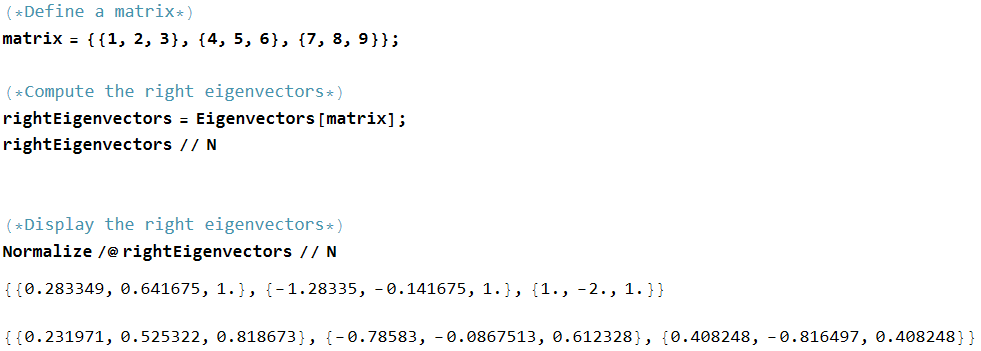